<a href="https://colab.research.google.com/github/kareembell12344/football/blob/main/Copy_of_football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas

In [2]:
import pandas as pd
df = pd.read_csv('Concussion Injuries 2012-2014.csv')
df.head()


,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


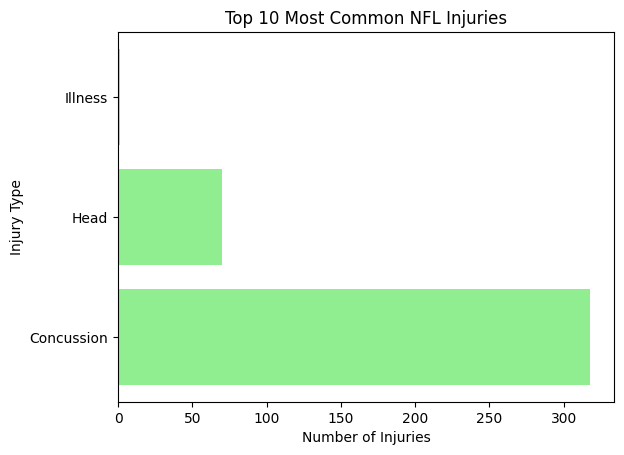

In [ ]:

injury_counts = df['Reported Injury Type'].value_counts().head(10)
plt.barh(injury_counts.index, injury_counts.values, color='lightgreen')
plt.title('Top 10 Most Common NFL Injuries')
plt.xlabel('Number of Injuries')
plt.ylabel('Injury Type')
plt.show()



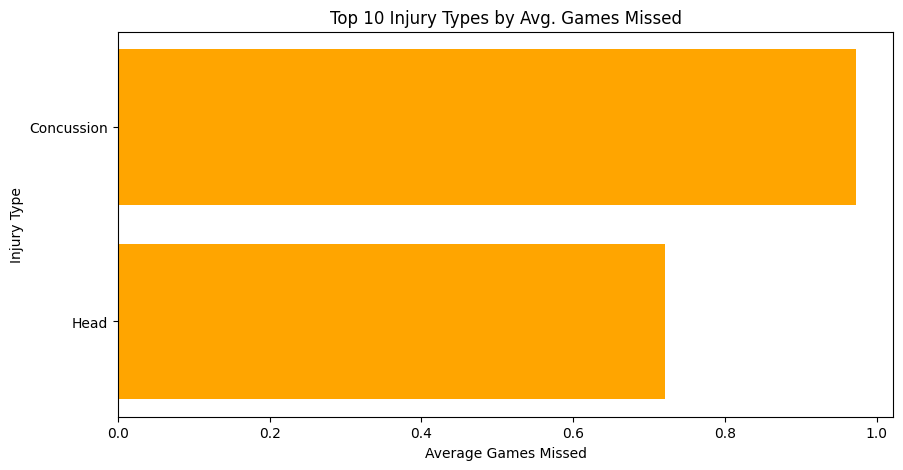

In [ ]:

injury_avg_missed = df.groupby('Reported Injury Type')['Games Missed'].mean()
injury_avg_missed = injury_avg_missed.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(injury_avg_missed.index, injury_avg_missed.values, color='orange')
plt.title('Top 10 Injury Types by Avg. Games Missed')
plt.xlabel('Average Games Missed')
plt.ylabel('Injury Type')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
df['Week of Injury'] = pd.to_numeric(df['Week of Injury'], errors='coerce')

def label(week):
    if pd.isna(week): return 'Unknown'
    if week <= 6: return 'Early'
    if week <= 12: return 'Mid'
    return 'Late'

df['Injury_Season_Timing'] = df['Week of Injury'].apply(label)


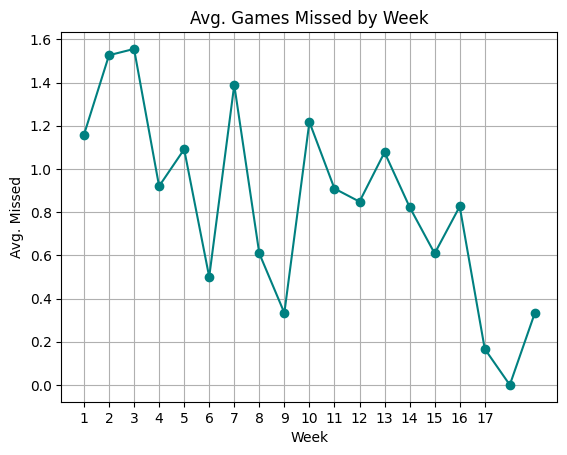

In [ ]:
avg = df.groupby('Week of Injury')['Games Missed'].mean()
plt.plot(avg, marker='o', color='teal')
plt.title('Avg. Games Missed by Week')
plt.xlabel('Week')
plt.ylabel('Avg. Missed')
plt.xticks(range(1, 18))
plt.grid(True)
plt.show()



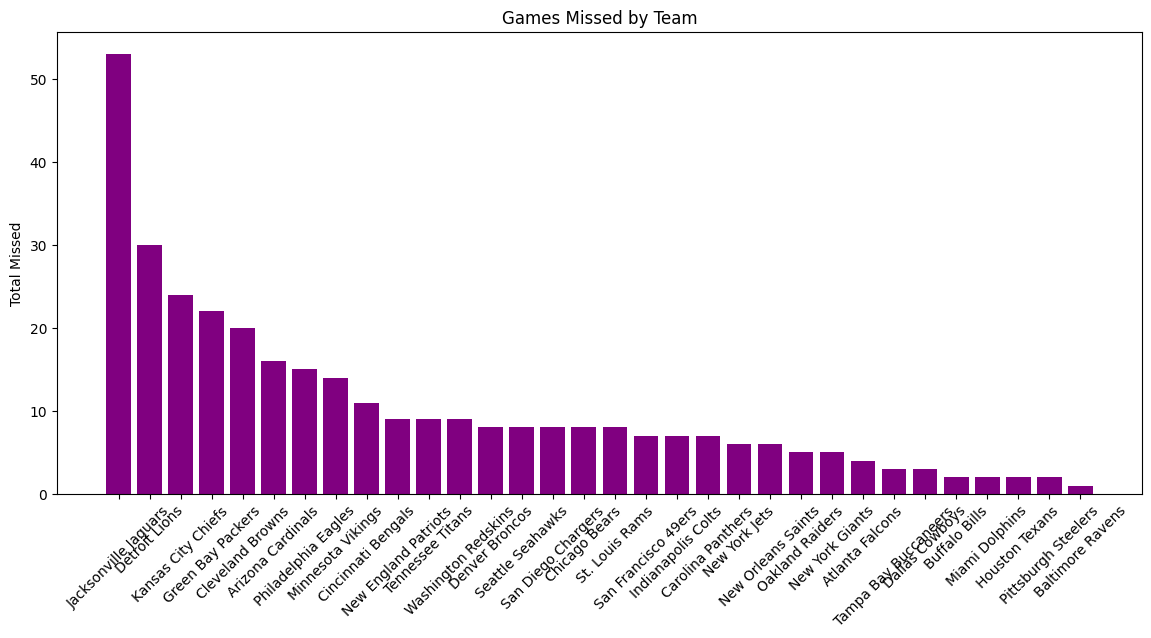

In [7]:

total = df.groupby('Team')['Games Missed'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
plt.bar(total.index, total.values, color='purple')
plt.title('Games Missed by Team')
plt.ylabel('Total Missed')
plt.xticks(rotation=45)
plt.show()
